In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import PyPDF2
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud

In [2]:
# Create a file path variable 
pdf_path = 'the_old_man_and_the_sea_-_ernest_hemingway.pdf'
# pdf_path = 'IIBA Global Business Analysis Core Standard.pdf'

# Create a function to extract text from pdf
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        pdf_len = len(pdf_reader.pages)
        text = ''
        for page_number in range(pdf_len):
            page = pdf_reader.pages[page_number]
            text += page.extract_text()
    return text

pdf_text = extract_text_from_pdf(pdf_path)
print(pdf_text)

Ernest Hemingway  The Old Man and the Sea 
 1The Old Man and the Sea 
 
By Ernest Hemingway 
 
  
To Charlie Shribner 
And 
To Max Perkins 
 
  
He was an old man who fished alone in a skiff in  the Gulf Stream and he had gone eighty-four 
days now without taking a fish. In the first forty da ys a boy had been with him. But after forty days 
without a fish the boy’s parents had told him that  the old man was now defi nitely and finally salao, 
which is the worst form of unlucky, and the boy had gone at their orders  in another boat which 
caught three good fish the first week. It made the boy sad to see th e old man come in each day with 
his skiff empty and he always went down to help him carry either the coiled lines or the gaff and harpoon and the sail that was furled around the ma st. The sail was patched with flour sacks and, 
furled, it looked like the flag of permanent defeat. 
The old man was thin and gaunt with deep wrinkles in the back of his neck. The brown 
blotches of the

In [50]:
# Create a function to tokenize the text
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if re.match('^[a-zA-Z0-9]+$', token)]
    return tokens

tokens = tokenize_text(pdf_text)
tokens

['Ernest',
 'Hemingway',
 'The',
 'Old',
 'Man',
 'and',
 'the',
 'Sea',
 '1The',
 'Old',
 'Man',
 'and',
 'the',
 'Sea',
 'By',
 'Ernest',
 'Hemingway',
 'To',
 'Charlie',
 'Shribner',
 'And',
 'To',
 'Max',
 'Perkins',
 'He',
 'was',
 'an',
 'old',
 'man',
 'who',
 'fished',
 'alone',
 'in',
 'a',
 'skiff',
 'in',
 'the',
 'Gulf',
 'Stream',
 'and',
 'he',
 'had',
 'gone',
 'days',
 'now',
 'without',
 'taking',
 'a',
 'fish',
 'In',
 'the',
 'first',
 'forty',
 'da',
 'ys',
 'a',
 'boy',
 'had',
 'been',
 'with',
 'him',
 'But',
 'after',
 'forty',
 'days',
 'without',
 'a',
 'fish',
 'the',
 'boy',
 's',
 'parents',
 'had',
 'told',
 'him',
 'that',
 'the',
 'old',
 'man',
 'was',
 'now',
 'defi',
 'nitely',
 'and',
 'finally',
 'salao',
 'which',
 'is',
 'the',
 'worst',
 'form',
 'of',
 'unlucky',
 'and',
 'the',
 'boy',
 'had',
 'gone',
 'at',
 'their',
 'orders',
 'in',
 'another',
 'boat',
 'which',
 'caught',
 'three',
 'good',
 'fish',
 'the',
 'first',
 'week',
 'It',
 'mad

In [57]:
# Create a function to remove stopwords
def remove_stopwords(tokens):
    stopword_list = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    return filtered_tokens

filtered_tokens = remove_stopwords(tokens)
filtered_tokens

['Ernest',
 'Hemingway',
 'Old',
 'Man',
 'Sea',
 '1The',
 'Old',
 'Man',
 'Sea',
 'Ernest',
 'Hemingway',
 'Charlie',
 'Shribner',
 'Max',
 'Perkins',
 'old',
 'man',
 'fished',
 'alone',
 'skiff',
 'Gulf',
 'Stream',
 'gone',
 'days',
 'without',
 'taking',
 'fish',
 'first',
 'forty',
 'da',
 'ys',
 'boy',
 'forty',
 'days',
 'without',
 'fish',
 'boy',
 'parents',
 'told',
 'old',
 'man',
 'defi',
 'nitely',
 'finally',
 'salao',
 'worst',
 'form',
 'unlucky',
 'boy',
 'gone',
 'orders',
 'another',
 'boat',
 'caught',
 'three',
 'good',
 'fish',
 'first',
 'week',
 'made',
 'boy',
 'sad',
 'see',
 'th',
 'e',
 'old',
 'man',
 'come',
 'day',
 'skiff',
 'empty',
 'always',
 'went',
 'help',
 'carry',
 'either',
 'coiled',
 'lines',
 'gaff',
 'harpoon',
 'sail',
 'furled',
 'around',
 'st',
 'sail',
 'patched',
 'flour',
 'sacks',
 'furled',
 'looked',
 'like',
 'flag',
 'permanent',
 'defeat',
 'old',
 'man',
 'thin',
 'gaunt',
 'deep',
 'wrinkles',
 'back',
 'neck',
 'brown',
 'bl

In [55]:
# Create a function to stem the tokens
def stem_tokens(filtered_tokens):
    stemmer = nltk.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

stemmed_tokens = stem_tokens(filtered_tokens)
stemmed_tokens

['ernest',
 'hemingway',
 'the',
 'old',
 'man',
 'sea',
 '1the',
 'old',
 'man',
 'sea',
 'by',
 'ernest',
 'hemingway',
 'to',
 'charli',
 'shribner',
 'and',
 'to',
 'max',
 'perkin',
 'he',
 'old',
 'man',
 'fish',
 'alon',
 'skiff',
 'gulf',
 'stream',
 'gone',
 'day',
 'without',
 'take',
 'fish',
 'in',
 'first',
 'forti',
 'da',
 'ys',
 'boy',
 'but',
 'forti',
 'day',
 'without',
 'fish',
 'boy',
 'parent',
 'told',
 'old',
 'man',
 'defi',
 'nite',
 'final',
 'salao',
 'worst',
 'form',
 'unlucki',
 'boy',
 'gone',
 'order',
 'anoth',
 'boat',
 'caught',
 'three',
 'good',
 'fish',
 'first',
 'week',
 'it',
 'made',
 'boy',
 'sad',
 'see',
 'th',
 'e',
 'old',
 'man',
 'come',
 'day',
 'skiff',
 'empti',
 'alway',
 'went',
 'help',
 'carri',
 'either',
 'coil',
 'line',
 'gaff',
 'harpoon',
 'sail',
 'furl',
 'around',
 'st',
 'the',
 'sail',
 'patch',
 'flour',
 'sack',
 'furl',
 'look',
 'like',
 'flag',
 'perman',
 'defeat',
 'the',
 'old',
 'man',
 'thin',
 'gaunt',
 'dee

In [58]:
# Create a funciton to lem the tokens
def lem_tokens(filtered_tokens):
    lemmer = nltk.WordNetLemmatizer()
    lemmed_tokens = [lemmer.lemmatize(token) for token in filtered_tokens]
    return lemmed_tokens

lemmed_tokens = lem_tokens(filtered_tokens)
lemmed_tokens

['Ernest',
 'Hemingway',
 'Old',
 'Man',
 'Sea',
 '1The',
 'Old',
 'Man',
 'Sea',
 'Ernest',
 'Hemingway',
 'Charlie',
 'Shribner',
 'Max',
 'Perkins',
 'old',
 'man',
 'fished',
 'alone',
 'skiff',
 'Gulf',
 'Stream',
 'gone',
 'day',
 'without',
 'taking',
 'fish',
 'first',
 'forty',
 'da',
 'y',
 'boy',
 'forty',
 'day',
 'without',
 'fish',
 'boy',
 'parent',
 'told',
 'old',
 'man',
 'defi',
 'nitely',
 'finally',
 'salao',
 'worst',
 'form',
 'unlucky',
 'boy',
 'gone',
 'order',
 'another',
 'boat',
 'caught',
 'three',
 'good',
 'fish',
 'first',
 'week',
 'made',
 'boy',
 'sad',
 'see',
 'th',
 'e',
 'old',
 'man',
 'come',
 'day',
 'skiff',
 'empty',
 'always',
 'went',
 'help',
 'carry',
 'either',
 'coiled',
 'line',
 'gaff',
 'harpoon',
 'sail',
 'furled',
 'around',
 'st',
 'sail',
 'patched',
 'flour',
 'sack',
 'furled',
 'looked',
 'like',
 'flag',
 'permanent',
 'defeat',
 'old',
 'man',
 'thin',
 'gaunt',
 'deep',
 'wrinkle',
 'back',
 'neck',
 'brown',
 'blotch',
 

In [59]:
# Create a function to perform POS tagging
def pos_tagging(tokens):
    pos_tagged_tokens = nltk.pos_tag(tokens, tagset='universal')
    return pos_tagged_tokens

pos_tagged_tokens = pos_tagging(lemmed_tokens)
pos_tagged_tokens

[('Ernest', 'NOUN'),
 ('Hemingway', 'NOUN'),
 ('Old', 'NOUN'),
 ('Man', 'NOUN'),
 ('Sea', 'NOUN'),
 ('1The', 'NUM'),
 ('Old', 'NOUN'),
 ('Man', 'NOUN'),
 ('Sea', 'NOUN'),
 ('Ernest', 'NOUN'),
 ('Hemingway', 'NOUN'),
 ('Charlie', 'NOUN'),
 ('Shribner', 'NOUN'),
 ('Max', 'NOUN'),
 ('Perkins', 'NOUN'),
 ('old', 'ADJ'),
 ('man', 'NOUN'),
 ('fished', 'VERB'),
 ('alone', 'ADV'),
 ('skiff', 'ADJ'),
 ('Gulf', 'NOUN'),
 ('Stream', 'NOUN'),
 ('gone', 'VERB'),
 ('day', 'NOUN'),
 ('without', 'ADP'),
 ('taking', 'VERB'),
 ('fish', 'ADJ'),
 ('first', 'ADJ'),
 ('forty', 'NOUN'),
 ('da', 'NOUN'),
 ('y', 'NOUN'),
 ('boy', 'ADJ'),
 ('forty', 'ADJ'),
 ('day', 'NOUN'),
 ('without', 'ADP'),
 ('fish', 'ADJ'),
 ('boy', 'NOUN'),
 ('parent', 'NOUN'),
 ('told', 'VERB'),
 ('old', 'ADJ'),
 ('man', 'NOUN'),
 ('defi', 'VERB'),
 ('nitely', 'ADV'),
 ('finally', 'ADV'),
 ('salao', 'ADJ'),
 ('worst', 'ADJ'),
 ('form', 'NOUN'),
 ('unlucky', 'ADJ'),
 ('boy', 'NOUN'),
 ('gone', 'VERB'),
 ('order', 'NOUN'),
 ('another', 'D

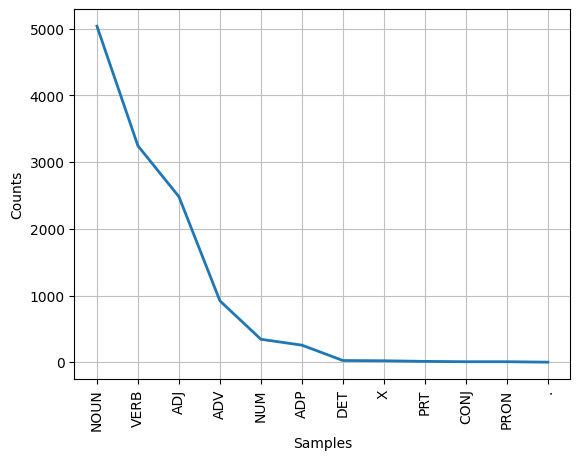

In [60]:
# Create a function to plot the POS tags
def plot_pos_tags(pos_tagged_tokens):
    pos_tags = [tag for word, tag in pos_tagged_tokens]
    pos_tag_counts = nltk.FreqDist(pos_tags)
    pos_tag_counts.plot()

plot_pos_tags(pos_tagged_tokens)

In [47]:
# Create a function to perform chunking
def chunking(pos_tagged_tokens):
    chunk_grammar = 'NP: {<DT>?<JJ>*<NN>}'
    chunk_parser = nltk.RegexpParser(chunk_grammar)
    chunked_tokens = chunk_parser.parse(pos_tagged_tokens)
    return chunked_tokens

chunked_tokens = chunking(pos_tagged_tokens)
chunked_tokens

In [10]:
# # Create a function to perform chinking 
# def chinking():
#     chinking_pattern = r"""
#         NP: {<.*>+}        
#         }<VB.*>{            
#     """
    
#     # Create a chinking parser with the defined pattern
#     chinking_parser = nltk.RegexpParser(chinking_pattern)
    
#     # Apply chinking to the chunked sentence
#     chinked_sentence = chinking_parser.parse(chunked_tokens)
    
#     return chinked_sentence

# chinked_tokens = chinking()
# chinked_tokens

In [61]:
# Create a function to perform NER
def ner(text):
    ner_tree = nltk.ne_chunk(text)
    return ner_tree

ner_result = ner(pos_tagged_tokens)
# for chunk in ner_result:
#     if hasattr(chunk, 'label') and chunk.label() is not None:
#         print(f"Entity: {' '.join(c[0] for c in chunk)}, Label: {chunk.label()}")

for chunk in ner_result:
    if isinstance(chunk, nltk.Tree):
        print(f"Entity: {' '.join(c[0] for c in chunk)}, Label: {chunk.label()}")

Entity: Yankees, Label: ORGANIZATION
Entity: Yankees, Label: ORGANIZATION
Entity: Martin, Label: PERSON
Entity: Tell, Label: ORGANIZATION
Entity: American, Label: GPE
Entity: Yankees, Label: ORGANIZATION
Entity: Tell, Label: ORGANIZATION
Entity: John, Label: PERSON
Entity: Ernest Hemingway Old Man Sea, Label: PERSON
Entity: Ernest Hemingway Old Man Sea, Label: PERSON
Entity: Yankees New York, Label: ORGANIZATION
Entity: Galanos, Label: PERSON
Entity: Tell, Label: ORGANIZATION
Entity: Ernest Hemingway Old Man Sea, Label: PERSON
Entity: Italian, Label: GPE
Entity: American, Label: GPE
Entity: United States, Label: GPE
Entity: Italian, Label: GPE


In [49]:
# Create a function to perform entity analysis
def entity_analysis(ner_result):
    entity_types = [chunk.label() for chunk in ner_result if isinstance(chunk, nltk.Tree)]
    entity_freq = Counter(entity_types)
    return entity_freq

entity_freq = entity_analysis(ner_result)
entity_freq

Counter()

In [13]:
# Create a function to perform sentiment analysis
def sentiment_analysis(text):
    # tokens = word_tokenize(text)
    words = [token for token in text]

    string = ' '.join(words)
    
    analysis = TextBlob(string)
    polarity_score = analysis.sentiment.polarity
    positive_score = max(0, analysis.sentiment.polarity)
    negative_score = -min(0, analysis.sentiment.polarity)
    neutral_score = 1 - abs(polarity_score)
    return positive_score, negative_score, neutral_score

positive_score, negative_score, neutral_score = sentiment_analysis(lemmed_tokens)

print("Positive Score:", positive_score)
print("Negative Score:", negative_score)
print("Neutral Score:", neutral_score)

Positive Score: 0.09754856089349075
Negative Score: 0
Neutral Score: 0.9024514391065093


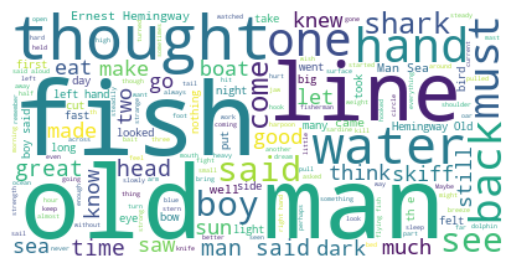

In [14]:
# Create a word cloud
def create_word_cloud(tokens):
    word_cloud = WordCloud(background_color='white').generate(' '.join(tokens))

    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return word_cloud

word_cloud = create_word_cloud(lemmed_tokens)
word_cloud

In [62]:
def extract_sentiment_words(text):
    positive_words = []
    negative_words = []
    neutral_words = []

    for word in text:
        # word = word[0]
        polarity_score = TextBlob(word).sentiment.polarity
        if polarity_score > 0:
            positive_words.append(word)
        elif polarity_score < 0:
            negative_words.append(word)
        else:
            neutral_words.append(word)

    return positive_words, negative_words, neutral_words

positive_words, negative_words, neutral_words = extract_sentiment_words(lemmed_tokens)
for word in lemmed_tokens:
    print(f'Word: {word}, Sentiment: {TextBlob(word).sentiment.polarity}')

Word: Ernest, Sentiment: 0.0
Word: Hemingway, Sentiment: 0.0
Word: Old, Sentiment: 0.1
Word: Man, Sentiment: 0.0
Word: Sea, Sentiment: 0.0
Word: 1The, Sentiment: 0.0
Word: Old, Sentiment: 0.1
Word: Man, Sentiment: 0.0
Word: Sea, Sentiment: 0.0
Word: Ernest, Sentiment: 0.0
Word: Hemingway, Sentiment: 0.0
Word: Charlie, Sentiment: 0.0
Word: Shribner, Sentiment: 0.0
Word: Max, Sentiment: 0.0
Word: Perkins, Sentiment: 0.0
Word: old, Sentiment: 0.1
Word: man, Sentiment: 0.0
Word: fished, Sentiment: 0.0
Word: alone, Sentiment: 0.0
Word: skiff, Sentiment: 0.0
Word: Gulf, Sentiment: 0.0
Word: Stream, Sentiment: 0.0
Word: gone, Sentiment: 0.0
Word: day, Sentiment: 0.0
Word: without, Sentiment: 0.0
Word: taking, Sentiment: 0.0
Word: fish, Sentiment: 0.0
Word: first, Sentiment: 0.25
Word: forty, Sentiment: 0.0
Word: da, Sentiment: 0.0
Word: y, Sentiment: 0.0
Word: boy, Sentiment: 0.0
Word: forty, Sentiment: 0.0
Word: day, Sentiment: 0.0
Word: without, Sentiment: 0.0
Word: fish, Sentiment: 0.0
Wor

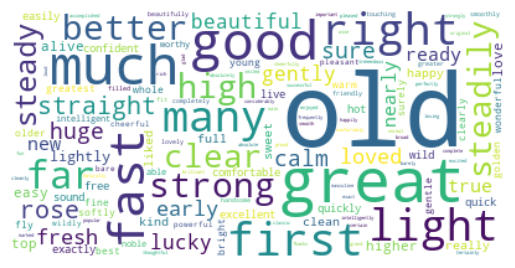

In [16]:
positive_wordcloud = create_word_cloud(positive_words)

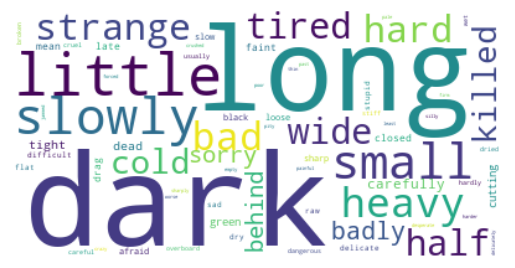

In [17]:
negative_wordcloud = create_word_cloud(negative_words)

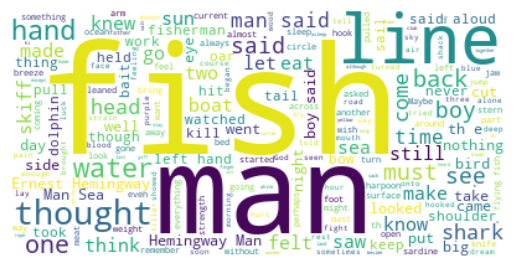

In [18]:
neutral_wordcloud = create_word_cloud(neutral_words)

In [19]:
def create_concordance(tokens, word):
    text = nltk.Text(tokens)
    return text.concordance(word)    

concordance = create_concordance(lemmed_tokens, 'man')

Displaying 25 of 293 matches:
Ernest Hemingway Old Man Sea 1The Old Man Sea Ernest Hemingway
Ernest Hemingway Old Man Sea 1The Old Man Sea Ernest Hemingway Charlie Shribner
gway Charlie Shribner Max Perkins old man fished alone skiff Gulf Stream gone d
 day without fish boy parent told old man defi nitely finally salao worst form 
 first week made boy sad see th e old man come day skiff empty always went help
looked like flag permanent defeat old man thin gaunt deep wrinkle back neck bro
d bank skiff hauled could go made old man taught boy fish boy loved old man sai
old man taught boy fish boy loved old man said lucky boat Stay remember went da
 big one every day three remember old man said know leave papa made leave boy m
apa made leave boy must obey know old man said quite much 10 old man said Yes b
y know old man said quite much 10 old man said Yes boy said offer beer Terrace 
aid offer beer Terrace take stuff old man said sat Terrace many fisherme n made
 Terrace many fisherme n ma

In [20]:
concordance = create_concordance(lemmed_tokens, 'dark')

Displaying 25 of 40 matches:
 table old man took trouser went bed dark rolled trouser make pillow putting n
walked road old man shack along road dark barefoot men moving carrying mast bo
thrust blade water began row harbour dark boat ache going sea old man heard di
ose surface night wandering fish fed dark old man could feel morning coming ro
orry bird especially small delica te dark tern always flying looking almost ne
ked water watched line went straight dark water ke pt straighter anyone level 
een line gray blue hill behind water dark bl ue dark almost purple looked saw 
ay blue hill behind water dark bl ue dark almost purple looked saw red sifting
rple looked saw red sifting plankton dark water strange light sun made watched
d looked like high snow mountain sea dark light made prism water myriad fleck 
41 fresh six hundred foot cold water dark Make another turn dark come back eat
ot cold water dark Make another turn dark come back eat felt light delicate pu
ice old man thought cho

In [21]:
concordance = create_concordance(lemmed_tokens, 'rose')

Displaying 13 of 13 matches:
uite light moment sun would rise sun rose thinly sea old man could see boat lo
urrent sun brighter glare came water rose clear flat se sent back eye hurt sha
d big fish must somewhere cloud land rose like mountain coast long green line 
 hated taste worse getting th e hour rose good cold grippe good eye old man lo
 37 fish old man watched small tu na rose air turned dropped head first water 
ingway Old Man Sea 10another another rose jumping direction churning water lea
t moved steadily first edge th e sun rose old man right shoulder headed north 
ming said Come hand Please come line rose slowly steadily sur face ocean bulge
 long baseba bat tapered like rapier rose full length water sm oothly like div
d wood slice fish cheek crushed knee rose slowly foot ceding line slowly time 
fish turned come toward boat old man rose foot started pivoting weaving pullin
ned fish side behind great chest fin rose high air altitude man chest felt iro
 pushed weight fish cam

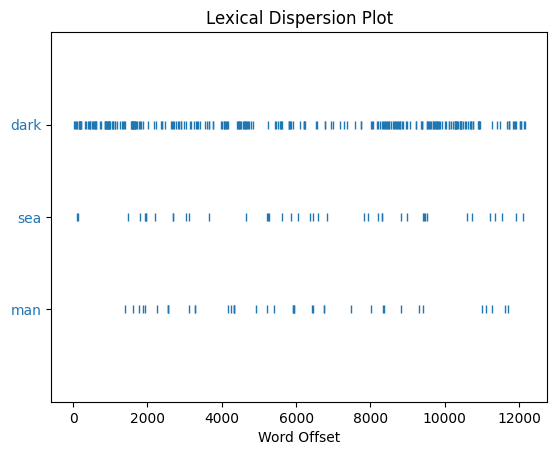

In [22]:
# Create a function to perform dispersion plot
def create_dispersion_plot(tokens, *args):
    text = nltk.Text(tokens)
    text.dispersion_plot(args)

create_dispersion_plot(lemmed_tokens, 'man', 'sea', 'dark')

In [23]:
# Create a function to perform collocation
def create_collocation(tokens):
    text = nltk.Text(tokens)
    return text.collocation_list()

collocation = create_collocation(lemmed_tokens)
collocation

[('old', 'man'),
 ('Man', 'Sea'),
 ('Old', 'Man'),
 ('Ernest', 'Hemingway'),
 ('Hemingway', 'Old'),
 ('man', 'said'),
 ('said', 'aloud'),
 ('left', 'hand'),
 ('could', 'see'),
 ('boy', 'said'),
 ('right', 'hand'),
 ('thou', 'ght'),
 ('flying', 'fish'),
 ('reserve', 'coil'),
 ('bone', 'spur'),
 ('cast', 'net'),
 ('hundred', 'fathom'),
 ('Gulf', 'weed'),
 ('across', 'shoulder'),
 ('head', 'clear')]

In [35]:
# pdf_path_1 = 'I want to eat your pancreas.pdf'

# pdf_text_1 = extract_text_from_pdf(pdf_path_1)
# print(pdf_text_1)

 
 
 
 
 
 
 
 
 
 
I Want to Eat Your Pancreas  
Yoru Sumino  
 
 
 
 
 
 
 
 
 
 
 
 
 
   
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Cover Design    loundraw  
Translation    shou7  3 
  
 
 
 
 
 
 
 
 
 
The funeral of my classmate, Sakura Yamauchi, was 
held on a cloudy day that didn’t seem unfitting of her when 
she was alive.  
As proof of the value of her life, many were covered in 
tears during the ritual, as well as last night’s wake - neither of 
which I attended. I stayed home the whole time.  
Fortunately,  the only classmate who would’ ve forced 
me to attend had already left this world, and it wasn’t as if 
either our teacher or her parents had the right or the 
obligation to  request my presence, so I was allowed to stand 
by my own decision.  
Certainly, I, a high school student even without being 
acknowledged by anyone as such, was supposed to be 
attending school - but because she  had died in the middle of 
a school vacation, I was able to avoid going o

In [36]:
# token_1 = tokenize_text(pdf_text_1)
# token_1

['I',
 'Want',
 'to',
 'Eat',
 'Your',
 'Pancreas',
 'Yoru',
 'Sumino',
 'Cover',
 'Design',
 'loundraw',
 'Translation',
 'shou7',
 '3',
 'The',
 'funeral',
 'of',
 'my',
 'classmate',
 'Sakura',
 'Yamauchi',
 'was',
 'held',
 'on',
 'a',
 'cloudy',
 'day',
 'that',
 'didn',
 't',
 'seem',
 'unfitting',
 'of',
 'her',
 'when',
 'she',
 'was',
 'alive',
 'As',
 'proof',
 'of',
 'the',
 'value',
 'of',
 'her',
 'life',
 'many',
 'were',
 'covered',
 'in',
 'tears',
 'during',
 'the',
 'ritual',
 'as',
 'well',
 'as',
 'last',
 'night',
 's',
 'wake',
 'neither',
 'of',
 'which',
 'I',
 'attended',
 'I',
 'stayed',
 'home',
 'the',
 'whole',
 'time',
 'Fortunately',
 'the',
 'only',
 'classmate',
 'who',
 'would',
 've',
 'forced',
 'me',
 'to',
 'attend',
 'had',
 'already',
 'left',
 'this',
 'world',
 'and',
 'it',
 'wasn',
 't',
 'as',
 'if',
 'either',
 'our',
 'teacher',
 'or',
 'her',
 'parents',
 'had',
 'the',
 'right',
 'or',
 'the',
 'obligation',
 'to',
 'request',
 'my',
 'p

In [37]:
# filtered_token_1 = remove_stopwords(token_1)
# filtered_token_1

['Want',
 'Eat',
 'Pancreas',
 'Yoru',
 'Sumino',
 'Cover',
 'Design',
 'loundraw',
 'Translation',
 'shou7',
 '3',
 'funeral',
 'classmate',
 'Sakura',
 'Yamauchi',
 'held',
 'cloudy',
 'day',
 'seem',
 'unfitting',
 'alive',
 'proof',
 'value',
 'life',
 'many',
 'covered',
 'tears',
 'ritual',
 'well',
 'last',
 'night',
 'wake',
 'neither',
 'attended',
 'stayed',
 'home',
 'whole',
 'time',
 'Fortunately',
 'classmate',
 'would',
 'forced',
 'attend',
 'already',
 'left',
 'world',
 'either',
 'teacher',
 'parents',
 'right',
 'obligation',
 'request',
 'presence',
 'allowed',
 'stand',
 'decision',
 'Certainly',
 'high',
 'school',
 'student',
 'even',
 'without',
 'acknowledged',
 'anyone',
 'supposed',
 'attending',
 'school',
 'died',
 'middle',
 'school',
 'vacation',
 'able',
 'avoid',
 'going',
 'bad',
 'weather',
 'Since',
 'parents',
 'work',
 'left',
 'adequate',
 'lunch',
 'remained',
 'holed',
 'room',
 'actions',
 'mine',
 'due',
 'loneliness',
 '4',
 'emptiness',
 'l

In [38]:
# lem_tokens_1 = lem_tokens(filtered_token_1)
# lem_tokens_1

['Want',
 'Eat',
 'Pancreas',
 'Yoru',
 'Sumino',
 'Cover',
 'Design',
 'loundraw',
 'Translation',
 'shou7',
 '3',
 'funeral',
 'classmate',
 'Sakura',
 'Yamauchi',
 'held',
 'cloudy',
 'day',
 'seem',
 'unfitting',
 'alive',
 'proof',
 'value',
 'life',
 'many',
 'covered',
 'tear',
 'ritual',
 'well',
 'last',
 'night',
 'wake',
 'neither',
 'attended',
 'stayed',
 'home',
 'whole',
 'time',
 'Fortunately',
 'classmate',
 'would',
 'forced',
 'attend',
 'already',
 'left',
 'world',
 'either',
 'teacher',
 'parent',
 'right',
 'obligation',
 'request',
 'presence',
 'allowed',
 'stand',
 'decision',
 'Certainly',
 'high',
 'school',
 'student',
 'even',
 'without',
 'acknowledged',
 'anyone',
 'supposed',
 'attending',
 'school',
 'died',
 'middle',
 'school',
 'vacation',
 'able',
 'avoid',
 'going',
 'bad',
 'weather',
 'Since',
 'parent',
 'work',
 'left',
 'adequate',
 'lunch',
 'remained',
 'holed',
 'room',
 'action',
 'mine',
 'due',
 'loneliness',
 '4',
 'emptiness',
 'losin

In [28]:
# pos_tagged_tokens_1 = pos_tagging(lem_tokens_1)
# pos_tagged_tokens_1

In [29]:
# chunked_tokens_1 = chunking(pos_tagged_tokens_1)
# chunked_tokens_1

In [30]:
# ner_result_1 = ner(pos_tagged_tokens_1)
# # ner_result_1

# for chunk in ner_result_1:
#     if isinstance(chunk, nltk.Tree):
#         print(f"Entity: {' '.join(c[0] for c in chunk)}, Label: {chunk.label()}")

In [31]:
# positive_score_1, negative_score_1, neutral_score_1 = sentiment_analysis(pos_tagged_tokens_1)
# print("Positive Score:", positive_score_1)
# print("Negative Score:", negative_score_1)
# print("Neutral Score:", neutral_score_1)

In [32]:
# word_cloud_1 = create_word_cloud(lem_tokens_1)
# word_cloud_1

In [33]:
# positive_words_1, negative_words_1, neutral_words_1 = extract_sentiment_words(lem_tokens_1)

# for word in lem_tokens_1:
#     print(f'Word: {word}, Sentiment: {TextBlob(word).sentiment.polarity}')

In [34]:
# positive_wordcloud_1 = create_word_cloud(positive_words_1)
# positive_wordcloud_1

NameError: name 'positive_words_1' is not defined

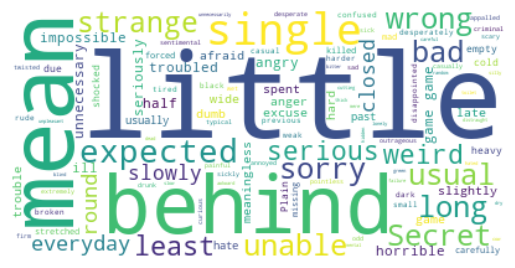

In [ ]:
# negative_wordcloud_1 = create_word_cloud(negative_words_1)
# negative_wordcloud_1

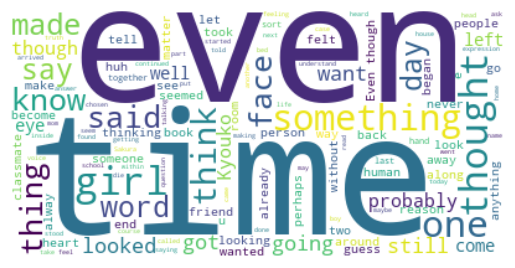

In [ ]:
# neutral_wordcloud_1 = create_word_cloud(neutral_words_1)
# neutral_wordcloud_1